# Research Question Analysis

In [ ]:
# libraries
import os
import sys
import inspect
sys.path.append("../src")

import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

from shared import directories
from shared import filenames
from shared import variables
sys.path.append(directories.ANALYSIS_PATH)

import visual
import multivariate
import bivariate

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Obtain training data

In [ ]:
df = pd.read_csv(os.path.join(directories.INTERIM_DATA_DIR,
                              filenames.TRAIN_FILENAME),
                 encoding="Latin-1", low_memory=False)
df['gender_o'] = np.where(df['gender']=='male', 'female', 'male')
# Subject Importances
df_importance_s = df[['decision', 'match', 'gender', 'race', 'importance_same_race', 'attractive_important', 'sincere_important', 
                    'intelligence_important', 'funny_important','ambitious_important', 'shared_interests_important']]
df_importance_s = pd.melt(df_importance_s, id_vars=['decision', 'match','gender', 'race'], var_name='characteristic', value_name='importance')

# Partner Importances
df_importance_o = df[['decision', 'match','gender_o', 'race_o', 'pref_o_attractive', 'pref_o_sincere', 
                    'pref_o_intelligence', 'pref_o_funny','pref_o_ambitious', 'pref_o_shared_interests']]
df_importance_o = pd.melt(df_importance_o, id_vars=['decision', 'match','gender_o', 'race_o'], var_name='characteristic', value_name='importance')


# Subject Self-Rating
df_subject_rating_s = df[['decision', 'match', 'gender', 'race', 'attractive', 'sincere','intelligence', 'funny','ambitious']]
df_subject_rating_s = pd.melt(df_subject_rating_s, id_vars=['decision', 'match','gender', 'race'], var_name='characteristic', value_name='rating')

# Subject Rating of Partner
df_partner_rating_s = df[['decision', 'match','gender', 'race', 'attractive_partner', 'sincere_partner','intelligence_partner', 
                          'funny_partner','ambitious_partner']]
df_partner_rating_s = pd.melt(df_partner_rating_s, id_vars=['decision', 'match','gender', 'race'], 
                              var_name='characteristic', value_name='rating')


# Partner Rating of Subject
df_subject_rating_o = df[['decision', 'match','gender', 'race', 'attractive_o', 'sincere_o','intelligence_o', 
                          'funny_o','ambitious_o']]
df_subject_rating_o = pd.melt(df_subject_rating_o, id_vars=['decision', 'match','gender', 'race'], 
                              var_name='characteristic', value_name='rating')

# Subject Interests
df_interests_s = df[['decision', 'match','gender', 'race', 'sports','tvsports','exercise','dining',
                          'museums','art','hiking','gaming','clubbing','reading','tv','theater','movies',
                          'concerts','music','shopping','yoga']]
df_interests_s = pd.melt(df_interests_s, id_vars=['decision', 'match','gender', 'race'], 
                              var_name='interest', value_name='rating')

## Preference Analysis
What are the preferences by gender and race

### Preferences by Gender
Signficant differences between the genders.  
- Males valued attractiveness significantly more than female subjects.
- Females valued sincerity more than male subjects
- Importance of intelligence was slightly greater among female subjects.
- Males valued a sense of humor slightly more than female subjects. 
- Female subjects valued shared interests more than male subjects.

In [ ]:
bp1 = visual.boxplot(df_importance_s, x='gender', y='importance', hue='characteristic', title='Preferences by Gender')
bp2 = visual.boxplot(df_importance_s, x='characteristic', y='importance', hue='gender', title='Preferences by Gender')

plt.show()

x = 'gender'
y = ['attractive_important', 'sincere_important', 'intelligence_important', 'funny_important',
     'ambitious_important', 'shared_interests_important']
for preference in y:
    i,d,p = bivariate.analysis(df, x, preference);
    print(color.BOLD + preference + " by Gender " + color.END)
    d
    print(color.BOLD + "Analysis of Variance" + color.END)
    i
    p
fig = ''
    

### Preferences by Race and Gender

In [ ]:
x = 'gender'
y = ['attractive_important', 'sincere_important', 'intelligence_important', 'funny_important',
     'ambitious_important', 'shared_interests_important']
for preference in y:
    visual.boxplot(df, x=x, y=preference, hue='race', title=preference)
    

## Decision Analysis

### RQ2: Characteristics most influenced decision
#### RQ2.1: Characteristics most influenced decision by demographic

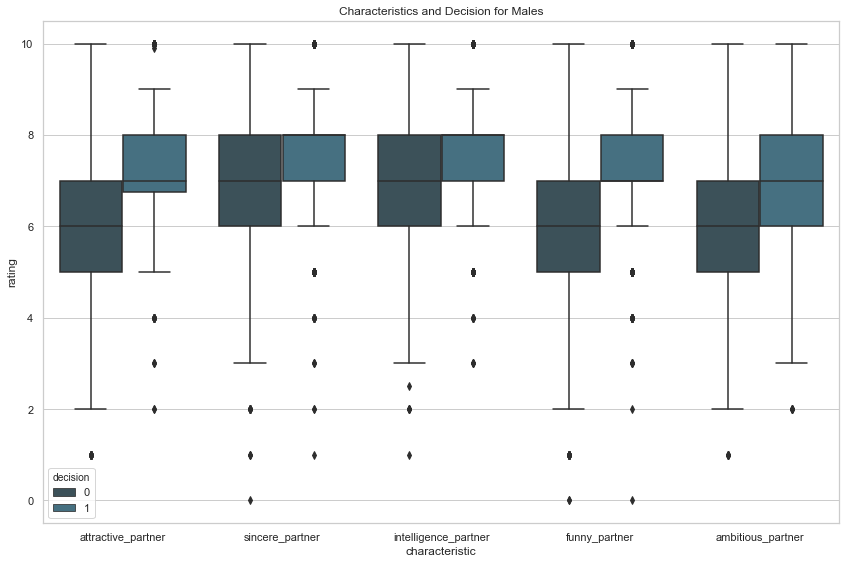

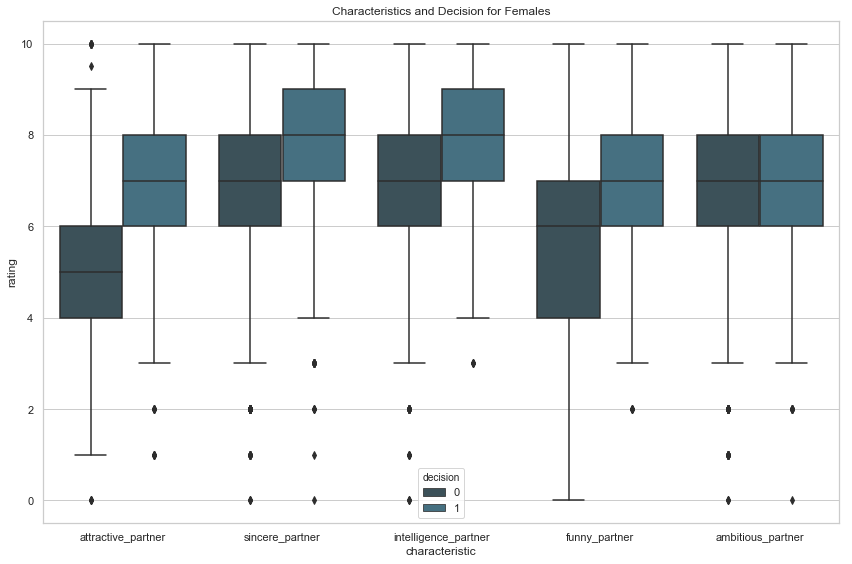

In [5]:
df2_1_males = df_partner_rating_s[df_partner_rating_s['gender'] == 'male']
df2_1_females = df_partner_rating_s[df_partner_rating_s['gender'] == 'female']

rq2_1_males = visual.boxplot(df2_1_males, x='characteristic', y='rating', hue='decision', 
                       title='Characteristics and Decision for Males')
rq2_1_females = visual.boxplot(df2_1_females, x='characteristic', y='rating', hue='decision', 
                       title='Characteristics and Decision for Females')